In [2]:
import osmnx as ox
import networkx as nx
from astar import AStar
from haversine import haversine

In [3]:
class MapGraph(AStar):
    def __init__(self,graph):
        self.graph = graph

    def heuristic_cost_estimate(self, n1, n2) -> float:
        if isinstance(n1, int):
            n1 = self.graph.nodes[n1]['x'], self.graph.nodes[n1]['y']
        if isinstance(n2, int):
            n2 = self.graph.nodes[n2]['x'], self.graph.nodes[n2]['y']
        x1, y1 = n1
        x2, y2 = n2
        return haversine((y1, x1), (y2, x2))
    
    def distance_between(self, n1, n2):
        if 'length' in self.graph[n1][n2]:
            return self.graph[n1][n2]['length']
        else:
            return 99999999 # return a large number if 'length' attribute is not present
    
    def neighbors(self, node):
        return list(self.graph.neighbors(node))
    

In [4]:
G = ox.graph_from_place("HSR, Bengaluru, India", network_type='drive')

In [5]:
source_coord = (12.903203, 77.648572)
dest_coord = (12.912441, 77.632885)

In [6]:
start_node = ox.distance.nearest_nodes(G, source_coord[1], source_coord[0])
goal_node = ox.distance.nearest_nodes(G, dest_coord[1], dest_coord[0])

In [7]:
astar = MapGraph(G)
path = astar.astar(start_node, goal_node)
path = list(path)

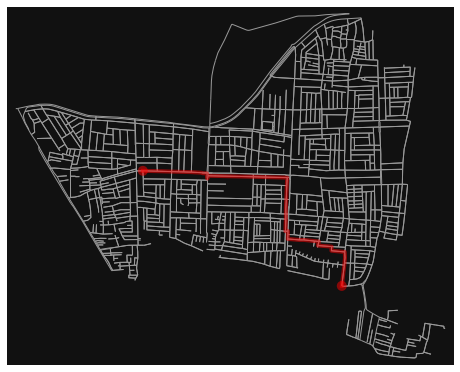

In [9]:
fig, ax = ox.plot_graph_route(G, path, route_color='r', node_size = 0)
